## Electricity price forecasting By Muusadique Hussain

### Internship NAVTTC Big Data Analysis

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_string_dtype, is_numeric_dtype,is_object_dtype
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder, label_binarize, MinMaxScaler
from sklearn.feature_selection import chi2, VarianceThreshold
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

Data set

In [2]:
dataset = pd.read_csv("electricity_prices.csv")
dataset.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8188\694181718.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("electricity_prices.csv")


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


## Exploratory Aata Analysis

Shape of data_set

In [3]:
dataset.shape

(38014, 18)

Checking Null Values of Data_set

In [4]:
dataset.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [6]:
dataset=dataset.replace('?', np.NaN)
dataset.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [7]:
variables = ['ForecastWindProduction','SystemLoadEA','SMPEA', 'ORKTemperature',
'ORKWindspeed','CO2Intensity','ActualWindProduction','SystemLoadEP2', 'SMPEP2']
dataset[variables] = dataset[variables].apply(pd.to_numeric)
dataset.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [8]:
dataset['DateTime']=pd.to_datetime(dataset['DateTime'],dayfirst=True)

In [9]:
dataset.describe()


,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38009.000000,38012.000000,38012.000000,37719.000000,37715.000000,38007.000000,38009.000000,38012.000000,38012.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105,544.261451,4020.085019,62.720388,9.626369,19.211770,479.373040,520.762819,3785.973841,64.136823
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108,414.364629,860.476866,32.252334,4.439934,9.571311,85.354706,378.282975,843.269455,35.415036
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000,189.670000,3281.207500,45.530000,6.000000,13.000000,421.105000,199.000000,3058.277500,45.780000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,441.980000,4103.600000,55.230000,9.000000,18.500000,480.310000,445.000000,3865.745000,55.545000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000,839.460000,4638.532500,70.320000,13.000000,24.100000,537.520000,793.000000,4427.590000,72.110000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


## Data visualization

Text(0.5, 1.0, 'Prices over date')

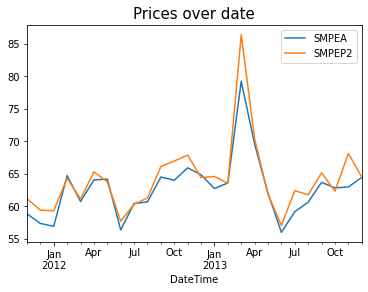

In [10]:
x_precio=dataset.set_index('DateTime')
x_precio[['SMPEA','SMPEP2']].resample('M').mean().plot()
plt.title("Prices over date", fontsize = 15)

Text(0.5, 1.0, 'Prices over weeks')

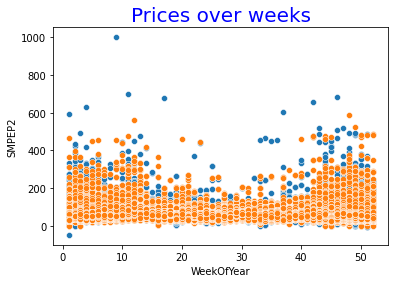

In [11]:
sns.scatterplot(data=dataset, x='WeekOfYear', y='SMPEP2')
sns.scatterplot(data=dataset, x='WeekOfYear', y='SMPEA')
plt.title("Prices over weeks", fontsize = 20 , color= 'blue')

<AxesSubplot:xlabel='ActualWindProduction'>

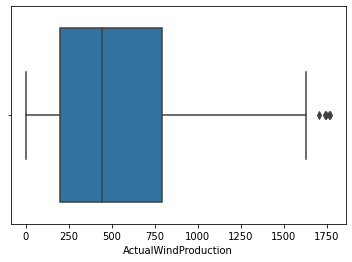

In [12]:
sns.boxplot(data=dataset, x='ActualWindProduction')

<AxesSubplot:xlabel='ForecastWindProduction'>

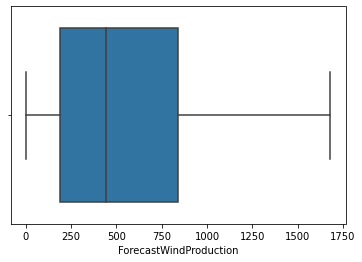

In [13]:
sns.boxplot(data=dataset, x='ForecastWindProduction')

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2Intensity', ylabel='Density'>

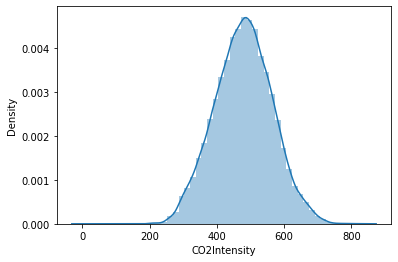

In [14]:
sns.distplot(dataset['CO2Intensity'])

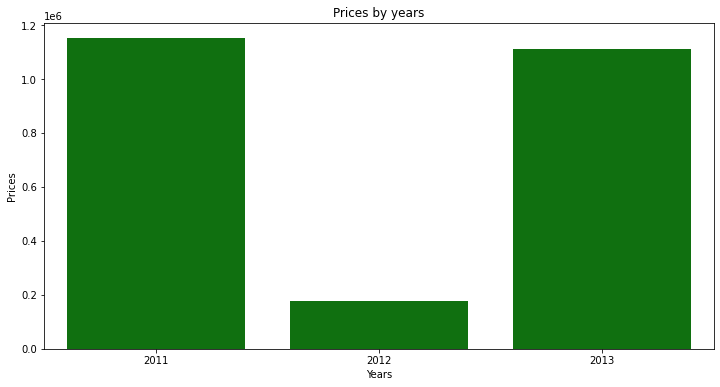

In [15]:
a = dataset.groupby("Year").sum()["SMPEP2"]
b = dataset["Year"].value_counts().index
plt.figure(figsize = (12,6))
sns.barplot(x = b, y = a, color = "green")
plt.title("Prices by years")
plt.xlabel("Years")
plt.ylabel("Prices")
plt.show()

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ORKWindspeed', ylabel='Density'>

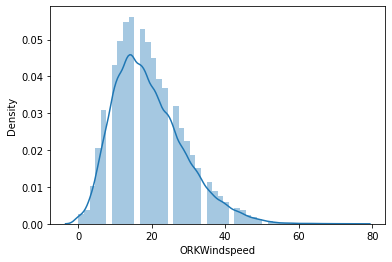

In [16]:
sns.distplot(dataset['ORKWindspeed'])

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ORKTemperature', ylabel='Density'>

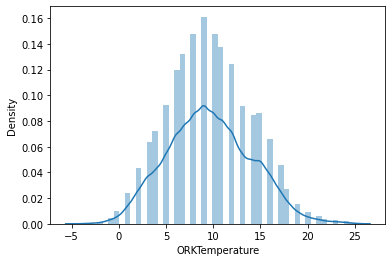

In [17]:
sns.distplot(dataset['ORKTemperature'])

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ORKTemperature'>

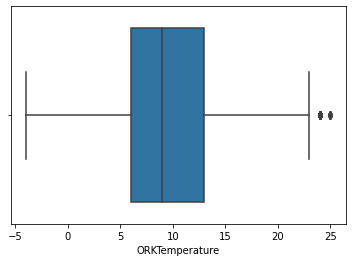

In [18]:
sns.boxplot(dataset['ORKTemperature'])

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SystemLoadEA'>

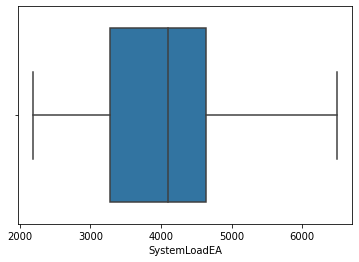

In [19]:
sns.boxplot(dataset['SystemLoadEA'])

c:\Users\DELL\miniconda3\envs\Magsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SystemLoadEP2'>

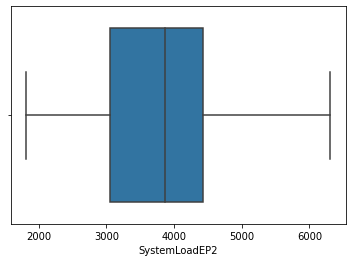

In [20]:
sns.boxplot(dataset['SystemLoadEP2'])

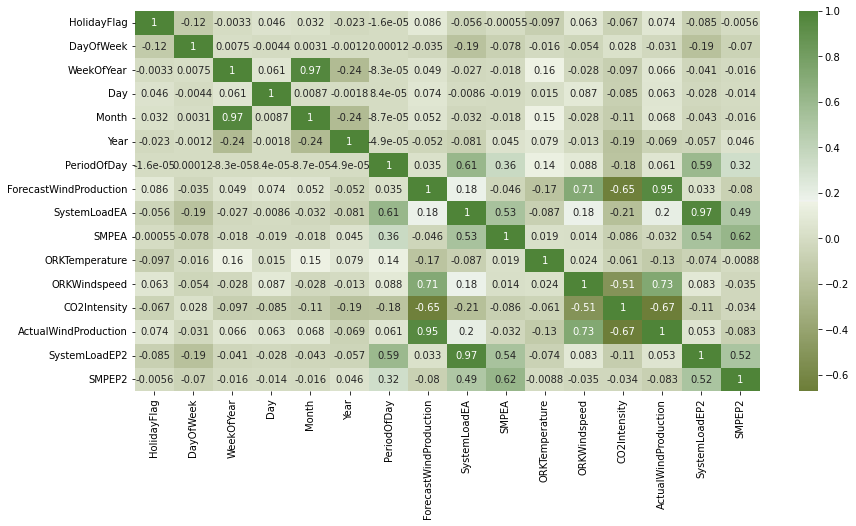

In [21]:
corr_df = dataset.corr(method='pearson')

plt.figure(figsize=(14, 7))
sns.heatmap(corr_df, annot=True, cmap=sns.diverging_palette(100, 120, n=300))
plt.show()

<AxesSubplot:xlabel='Holiday'>

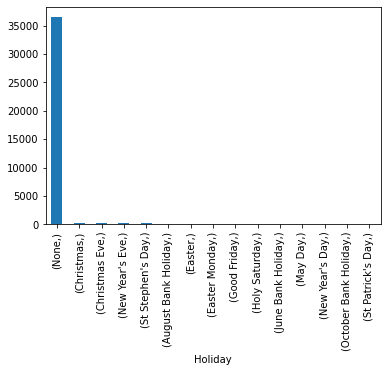

In [22]:
dataset.value_counts(['Holiday']).plot(kind='bar')


In [23]:
dataset.loc[dataset.SMPEP2==1000.00]

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
23193,2013-02-26 05:30:00,None,0,1,9,26,2,2013,11,142.8,3370.41,44.18,1.0,13.0,580.92,86.0,3304.05,1000.0


In [24]:
dataset=dataset.drop([23193])

In [25]:
dataset.Holiday.replace(('None', 'Christmas Eve', 'Christmas', "St Stephen's Day", "New Year's Eve",
                                 "New Year's Day", "St Patrick's Day", 'Good Friday', 'Holy Saturday',
                                 'Easter', 'Easter Monday', 'May Day', 'June Bank Holiday',
                                 'August Bank Holiday', 'October Bank Holiday'),
                                  (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15),inplace=True)

In [26]:
dataset.isnull()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
dataset.dropna()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,2011-11-01 00:00:00,1,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,1,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,1,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,1,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,2013-12-31 21:30:00,5,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,2013-12-31 22:00:00,5,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,2013-12-31 22:30:00,5,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,2013-12-31 23:00:00,5,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [28]:
dataset = dataset[np.isfinite(dataset).all(1)]

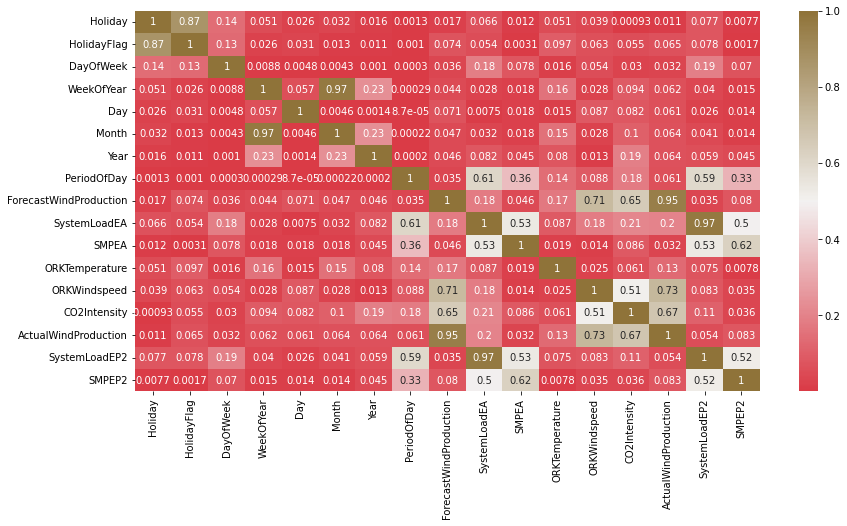

In [29]:
corr = abs(dataset.corr())
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(10, 60, n=300))
plt.show()

In [30]:
corr = abs(dataset.corr())
corr[['SMPEP2']].sort_values(by = 'SMPEP2',ascending = False).style.background_gradient()

,SMPEP2
SMPEP2,1.000000
SMPEA,0.624370
SystemLoadEP2,0.522343
SystemLoadEA,0.496245
PeriodOfDay,0.327169
ActualWindProduction,0.083406
ForecastWindProduction,0.079703
DayOfWeek,0.069572
Year,0.045188
CO2Intensity,0.036227


In [31]:
x = dataset
y = dataset.SMPEP2
x

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,2011-11-01 00:00:00,1,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,1,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,1,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,1,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,2013-12-31 21:30:00,5,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,2013-12-31 22:00:00,5,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,2013-12-31 22:30:00,5,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,2013-12-31 23:00:00,5,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [32]:
x = x.drop(columns = ['SMPEP2', "DateTime"])


## Applying ML models and predict Values

In [33]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
rf_regressor= LinearRegression().fit(x_train,y_train)
show_scores(rf_regressor)


NameError: name 'show_scores' is not defined

In [ ]:
xgb_regressor = XGBRegressor().fit(x_train, y_train)
show_scores(xgb_regressor)

{'Training MAE': 8.22556368959431,
 'Test MAE': 11.290889173307516,
 'Trainig R^2': 0.8652963243168725,
 'Test R^2': 0.5956194702084555}

In [ ]:
xgb_regressor = XGBRegressor().fit(x_train, y_train)
show_scores(xgb_regressor)

{'Training MAE': 8.22556368959431,
 'Test MAE': 11.290889173307516,
 'Trainig R^2': 0.8652963243168725,
 'Test R^2': 0.5956194702084555}

In [ ]:
rf_regressor = RandomForestRegressor().fit(x_train, y_train)
scores = cross_val_score(rf_regressor, x_train, y_train, scoring='r2', cv=5)
scores 

array([0.63843675, 0.60599668, 0.63568457, 0.60843207, 0.60944507])

In [ ]:
dataset_vif = x.copy(deep=True)
features = list(dataset_vif.columns)
dataset_vif = x[features]

for i in range(len(features)):
    var = features[i]
    fet= features[:]
    fet.remove(var)
    
    x = dataset_vif[fet]
    y = dataset[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1-model.score(x,y))
    
    print("The EL value of VIF for the variable", var, "Estimate:", vif)

The EL value of VIF for the variable Holiday Estimate: 4.288532391663799
The EL value of VIF for the variable HolidayFlag Estimate: 4.4090820483284885
The EL value of VIF for the variable DayOfWeek Estimate: 1.0980169542306846
The EL value of VIF for the variable WeekOfYear Estimate: 19.29021804479951
The EL value of VIF for the variable Day Estimate: 1.0804872853882026
The EL value of VIF for the variable Month Estimate: 19.30654001108065
The EL value of VIF for the variable Year Estimate: 1.0961874599248662
The EL value of VIF for the variable PeriodOfDay Estimate: 1.7606357783479194
The EL value of VIF for the variable ForecastWindProduction Estimate: 1.114976822268291
The EL value of VIF for the variable SystemLoadEA Estimate: 2.3611323328495626
The EL value of VIF for the variable SMPEA Estimate: 1.4631754379166926
The EL value of VIF for the variable ORKTemperature Estimate: 1.1587799504113792


In [ ]:
dataset_vif = x.copy(deep=True)
features = list(dataset_vif.columns)
features.remove("SystemLoadEA")
features.remove("WeekOfYear")
features.remove("ForecastWindProduction")
dataset_vif = x[features]

for i in range(len(features)):
    var = features[i]
    fet= features[:]
    fet.remove(var)
    
    x = dataset_vif[fet]
    y = dataset[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1-model.score(x,y))
    
    print("The EL value of the VIF for the variable", var, "es:", vif)

The EL value of the VIF for the variable Holiday es: 4.153269845519542
The EL value of the VIF for the variable HolidayFlag es: 4.141628976544365
The EL value of the VIF for the variable DayOfWeek es: 1.0277210181917797
The EL value of the VIF for the variable Day es: 1.0130271650306724
The EL value of the VIF for the variable Month es: 1.0641551836123222
The EL value of the VIF for the variable Year es: 1.0611226733000243
The EL value of the VIF for the variable PeriodOfDay es: 1.1466887560167576
The EL value of the VIF for the variable SMPEA es: 1.1566069243247563


In [ ]:
x.head()

,Holiday,HolidayFlag,DayOfWeek,Day,Month,Year,PeriodOfDay
0,1,0,1,1,11,2011,0
1,1,0,1,1,11,2011,1
2,1,0,1,1,11,2011,2
3,1,0,1,1,11,2011,3
4,1,0,1,1,11,2011,4


In [ ]:
x_1 = x
x

,Holiday,HolidayFlag,DayOfWeek,Day,Month,Year,PeriodOfDay
0,1,0,1,1,11,2011,0
1,1,0,1,1,11,2011,1
2,1,0,1,1,11,2011,2
3,1,0,1,1,11,2011,3
4,1,0,1,1,11,2011,4
...,...,...,...,...,...,...,...
38009,5,1,1,31,12,2013,43
38010,5,1,1,31,12,2013,44
38011,5,1,1,31,12,2013,45
38012,5,1,1,31,12,2013,46


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor().fit(x_train, y_train)
show_scores(rf_regressor)

{'Training MAE': 2.776096418758588,
 'Test MAE': 7.848723032018397,
 'Trainig R^2': 0.950612420711691,
 'Test R^2': 0.6160458152183708}